In [198]:
## importing libraries

import numpy as np                                          ## for numerical operations
import pandas as pd                                         ## for dataframe operations
import matplotlib.pyplot as plt                             ## for plotting
import seaborn as sns                                       ## for plotting
from sklearn.model_selection import train_test_split        ## for splitting into 80:20 ratio
from sklearn.model_selection import StratifiedShuffleSplit  ## datasplitting
from sklearn.model_selection import GridSearchCV            ## hyperparameter finding
from sklearn.ensemble import RandomForestClassifier         ## models from sklearn
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix,f1_score ## model evaluation metrics

%matplotlib inline   

In [199]:
df = pd.read_csv('salary,satisfaction.csv', engine='python')

In [ ]:
df.shape

In [ ]:
pd.set_option("display.max_columns",999)
df.head()

In [ ]:
##************** dti column (debt to income ratio) ********************

df['dti'].isnull().sum()

In [ ]:
##****************** latitude column **************

df['latitude'].isnull().sum(), df['latitude'].mean(), df['latitude'].median()

In [204]:
df['latitude'] = df['latitude'].fillna(38.89808218)

In [ ]:
df['latitude'].isnull().sum()

In [ ]:
##****************** longitude column **************

df['longitude'].isnull().sum(), df['longitude'].mean(), df['longitude'].median()

In [207]:
df['longitude'] = df['longitude'].fillna(-87.18085139)

In [208]:
df['longitude'].isnull().sum()

0

In [209]:
print(df['id'].duplicated().sum())

0


In [210]:
##as id is nominal column so we can delete it

del df['id']

In [ ]:
### checking null values

pd.set_option('display.max_row',90)         ## as all rows were not visible so extended option to display max rows till 90 
df.isna().sum() 

In [ ]:
df.nunique()

In [213]:
## ***************** Civil Service Title column ************************

df['Civil Service Title'].nunique(), df['Civil Service Title'].isnull().sum()

(312, 0)

In [ ]:
df['Civil Service Title'].value_counts()

In [ ]:
print(df['Civil Service Title'].str.contains('ENGINEER').sum()) 
print(df['Civil Service Title'].str.contains('INSPECTOR').sum())
print(df['Civil Service Title'].str.contains('ANALYST').sum())
print(df['Civil Service Title'].str.contains('ASSISTANT').sum())
print(df['Civil Service Title'].str.contains('ADMINISTRATIVE').sum())
print(df['Civil Service Title'].str.contains('SPECIALIST').sum())
print(df['Civil Service Title'].str.contains('COMPUTER').sum())
print(df['Civil Service Title'].str.contains('ASSOCIATE').sum())
print(df['Civil Service Title'].str.contains('CITY').sum())
print(df['Civil Service Title'].str.contains('MANAGER').sum())
print(df['Civil Service Title'].str.contains('PUBLIC').sum())
print(df['Civil Service Title'].str.contains('PROJECT').sum())
print(df['Civil Service Title'].str.contains('OPERATOR').sum())
print(df['Civil Service Title'].str.contains('IT').sum())

In [216]:
df.loc[df['Civil Service Title'].str.contains('ENGINEER'), 'Civil Service Title']= 'ENGINEER'
df.loc[df['Civil Service Title'].str.contains('ANALYST'), 'Civil Service Title']= 'ANALYST'
df.loc[df['Civil Service Title'].str.contains('ASSISTANT'), 'Civil Service Title']= 'ASSISTANT'
df.loc[df['Civil Service Title'].str.contains('ADMINISTRATIVE'), 'Civil Service Title']= 'ADMINISTRATION'
df.loc[df['Civil Service Title'].str.contains('SPECIALIST'), 'Civil Service Title']= 'SPECIALIST'
df.loc[df['Civil Service Title'].str.contains('ASSOCIATE'), 'Civil Service Title']= 'ASSOCIATE'
df.loc[df['Civil Service Title'].str.contains('COMPUTER'), 'Civil Service Title']= 'COMPUTER'
df.loc[df['Civil Service Title'].str.contains('CITY'), 'Civil Service Title']= 'CITY WORKER'
df.loc[df['Civil Service Title'].str.contains('MANAGER'), 'Civil Service Title']= 'MANAGER'
df.loc[df['Civil Service Title'].str.contains('PUBLIC'), 'Civil Service Title']= 'PUBLIC WORKER'
df.loc[df['Civil Service Title'].str.contains('PROJECT'), 'Civil Service Title']= 'PROJECT WORKER'
df.loc[df['Civil Service Title'].str.contains('IT'), 'Civil Service Title']= 'IT'

In [217]:
df['Civil Service Title'].unique() 

array(['CONTRACT REVIEWER (OFFICE OF L', 'ADMINISTRATION',
       'MAINTENANCE WORKER', 'PAINTER', 'ANALYST', 'ASSOCIATE', 'MANAGER',
       'IT', 'COMPUTER', 'SPECIALIST', 'PARALEGAL AIDE',
       'HIGH PRESSURE PLANT TENDER', 'ASSISTANT', 'ENGINEER',
       'PUBLIC WORKER', 'PEST CONTROL AIDE', 'SUPERVISOR II SOCIAL WORK',
       'PROGRAM EVALUATOR (ACS)', 'AGENCY ATTORNEY', 'INVESTIGATOR',
       'MACHINIST', 'SUPERVISOR OF STOCK WORKERS',
       'DIRECTOR OF FIELD OPERATIONS (', 'WATERSHED MAINTAINER',
       'AGENCY ATTORNEY INTERNE', 'PLASTERER',
       'SUPERVISOR (WATERSHED MAINTENA', 'ELECTRICIAN',
       'ASSOC SUPVR OF SCHL SEC (MGRL)', 'PLUMBER', 'BRIDGE OPERATOR',
       'WATER USE INSPECTOR', 'BOOKKEEPER', 'STOCK WORKER',
       'CORRECTIONAL STANDARDS REVIEW', 'DEPUTY COMMISSIONER (DEP)',
       'INSPECTOR (MULTI-DISCIPLINE)', 'CRIMINALIST',
       'EXECUTIVE AGENCY COUNSEL', 'TRAFFIC DEVICE MAINTAINER',
       'ACCOUNTANT', 'ADM HOUSING DEV SPEC(NON MGRL)',
       'MOTO

In [218]:
series = pd.value_counts(df['Civil Service Title'])
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
df['Civil Service Title'] = np.where(df['Civil Service Title'].isin(series[mask].index),'Other',df['Civil Service Title'])

In [219]:
dummiescst = pd.get_dummies(df['Civil Service Title'], prefix='Civil Service Title', drop_first=True)  ## getting dummies of unique values
df = pd.concat([ df , dummiescst], axis = 1)                                                           ## merging dummies dataframe with main dataframe (df)
del df['Civil Service Title'] 

In [220]:
##******************* Business Title column **********************************

In [221]:
df['Business Title'].value_counts(), df['Business Title'].nunique(), df['Business Title'].isnull().sum()

(Assistant Civil Engineer                              33
 Project Manager                                       29
 College Aide                                          24
 Construction Project Manager                          22
 ACCOUNTABLE MANAGER                                   20
                                                       ..
 Civilianization Manager                                1
 Associate Staff Analyst                                1
 Director of Business Practices Accountability Unit     1
 MEMBER OF THE ENVIRONMENTAL CO                         1
 Deputy Chief of Information Technology                 1
 Name: Business Title, Length: 1244, dtype: int64, 1244, 0)

In [222]:
df['Business Title'] = df['Business Title'].str.lower()

In [223]:
print(df['Business Title'].str.contains('engineer').sum())
print(df['Business Title'].str.contains('manager').sum())
print(df['Business Title'].str.contains('director').sum())
print(df['Business Title'].str.contains('analyst').sum())
print(df['Business Title'].str.contains('engineer').sum())
print(df['Business Title'].str.contains('administrator').sum())
print(df['Business Title'].str.contains('associate').sum())
print(df['Business Title'].str.contains('assistant').sum())
print(df['Business Title'].str.contains('it').sum())
print(df['Business Title'].str.contains('specialist').sum())

299
364
230
312
299
57
136
238
552
160


In [224]:
df.loc[df['Business Title'].str.contains('engineer'), 'Business Title']= 'engineer'
df.loc[df['Business Title'].str.contains('manager'), 'Business Title']= 'manager'
df.loc[df['Business Title'].str.contains('director'), 'Business Title']= 'director'
df.loc[df['Business Title'].str.contains('analyst'), 'Business Title']= 'analyst'
df.loc[df['Business Title'].str.contains('administrator'), 'Business Title']= 'administrator'
df.loc[df['Business Title'].str.contains('associate'), 'Business Title']= 'associate'
df.loc[df['Business Title'].str.contains('assistant'), 'Business Title']= 'assistant'
df.loc[df['Business Title'].str.contains('it'), 'Business Title']= 'it'
df.loc[df['Business Title'].str.contains('specialist'), 'Business Title']= 'specialist'

In [225]:
df['Business Title'].value_counts()

manager                                                     359
analyst                                                     305
it                                                          300
engineer                                                    299
director                                                    223
                                                           ... 
project development coordinator for manhattan ballfields      1
deputy acco                                                   1
administrative supervisor                                     1
hearings claim processor                                      1
supervising inspector, elevators                              1
Name: Business Title, Length: 419, dtype: int64

In [226]:
series = pd.value_counts(df['Business Title'])
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
df['Business Title'] = np.where(df['Business Title'].isin(series[mask].index),'Other',df['Business Title'])

In [227]:
dummiesbt = pd.get_dummies(df['Business Title'], prefix='Business Title', drop_first=True)  ## getting dummies of unique values
df = pd.concat([ df , dummiesbt], axis = 1)                                                 ## merging dummies dataframe with main dataframe (df)
del df['Business Title'] 

In [228]:
df.shape

(2946, 102)

In [229]:
df['LastNewJob'].value_counts(), df['LastNewJob'].nunique(), df['LastNewJob'].isnull().sum()

(Less than a year ago         895
 Between 1 and 2 years ago    585
 Between 2 and 4 years ago    528
 More than 4 years ago        488
 I've never had a job           3
 Name: LastNewJob, dtype: int64, 5, 447)

In [230]:
df['LastNewJob'] = df['LastNewJob'].fillna('Less than a year ago')

In [231]:
df.loc[df['LastNewJob']=="I've never had a job" , 'LastNewJob'] = 'Less than a year ago'

In [232]:
dummieslnj = pd.get_dummies(df['LastNewJob'], prefix = 'LastNewJob', drop_first=True)
del df['LastNewJob']
df = pd.concat([df , dummieslnj], axis=1)

In [233]:
df.shape

(2946, 104)

In [234]:
##********************* title column **********************************

In [235]:
df['title'].value_counts(), df['title'].isnull().sum(), df['title'].nunique()

(Debt consolidation         1699
 Credit card refinancing     699
 Home improvement            156
 Other                       141
 Major purchase               55
 Business                     33
 Car financing                30
 Medical expenses             21
 Home buying                  17
 Vacation                     17
 Moving and relocation        13
 Green loan                    1
 Name: title, dtype: int64, 64, 12)

In [236]:
df['title'] = df['title'].fillna('Debt consolidation')

In [237]:
df.loc[df['title']=='Major purchase', 'title'] = 'Other'
df.loc[df['title']=='Business', 'title'] = 'Other'
df.loc[df['title']=='Car financing', 'title'] = 'Other'
df.loc[df['title']=='Medical expenses', 'title'] = 'Other'
df.loc[df['title']=='Home buying', 'title'] = 'Other'
df.loc[df['title']=='Vacation', 'title'] = 'Other'
df.loc[df['title']=='Moving and relocation', 'title'] = 'Other'
df.loc[df['title']=='Green loan', 'title'] = 'Other'
df.loc[df['title']=='Home improvement', 'title'] = 'Other'

In [238]:
dummiestit = pd.get_dummies(df['title'], prefix = 'title', drop_first=True)
del df['title']
df = pd.concat([df ,dummiestit], axis=1)

In [239]:
df.shape

(2946, 105)

In [240]:
##**************** last_pymnt_d column*******************

In [241]:
df['last_pymnt_d'].value_counts(), df['last_pymnt_d'].isnull().sum(), df['last_pymnt_d'].nunique(), df['last_pymnt_d'].dtype

(19-Jan    444
 19-Feb    284
 19-Mar    128
 18-Dec    104
 18-Mar     78
 17-Sep     73
 17-Jan     71
 17-Nov     69
 17-May     69
 17-Feb     68
 17-Aug     67
 18-Jan     67
 17-Apr     66
 16-Oct     64
 17-Jun     64
 17-Dec     64
 16-Dec     64
 17-Mar     64
 18-Sep     62
 18-Jul     62
 17-Jul     58
 18-Apr     58
 18-Feb     58
 16-Sep     57
 18-Aug     55
 16-Jul     54
 16-Aug     54
 18-Nov     53
 18-Jun     52
 18-May     52
 18-Oct     52
 17-Oct     52
 16-May     49
 16-Nov     48
 16-Jun     44
 16-Mar     42
 16-Apr     41
 16-Feb     26
 16-Jan      9
 Name: last_pymnt_d, dtype: int64, 0, 39, dtype('O'))

In [242]:
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('19-Jan', '2019')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('19-Feb', '2019')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('19-Mar', '2019')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('18-Jan', '2018')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('18-Mar', '2018')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('18-Dec', '2018')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('18-Jul', '2018')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('18-Sep', '2018')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('18-Apr', '2018')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('18-Feb', '2018')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('18-Aug', '2018')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('18-Nov', '2018')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('18-May', '2018')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('18-Oct', '2018')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('18-Jun', '2018')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('17-Jan', '2017')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('17-Mar', '2017')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('17-Dec', '2017')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('17-Jul', '2017')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('17-Sep', '2017')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('17-Apr', '2017')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('17-Feb', '2017')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('17-Aug', '2017')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('17-Nov', '2017')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('17-May', '2017')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('17-Oct', '2017')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('17-Jun', '2017')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('16-Jan', '2016')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('16-Mar', '2016')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('16-Dec', '2016')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('16-Jul', '2016')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('16-Sep', '2016')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('16-Apr', '2016')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('16-Feb', '2016')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('16-Aug', '2016')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('16-Nov', '2016')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('16-May', '2016')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('16-Oct', '2016')
df['last_pymnt_d'] = df['last_pymnt_d'].str.replace('16-Jun', '2016')

In [243]:
dummieslpd = pd.get_dummies(df['last_pymnt_d'], prefix = 'last_pymnt_d', drop_first=True)
del df['last_pymnt_d']
df = pd.concat([df ,dummieslpd], axis=1)

In [244]:
df.shape

(2946, 107)

In [245]:
##****************** last_credit_pull_d column *****************************

In [246]:
df['last_credit_pull_d'].value_counts(), df['last_credit_pull_d'].isnull().sum(), df['last_credit_pull_d'].nunique(), df['last_credit_pull_d'].dtype

(19-Mar    1287
 18-Dec     237
 19-Jan     166
 19-Feb     155
 18-Jul      95
 18-Nov      73
 18-Oct      69
 18-Sep      58
 18-Aug      56
 18-Mar      53
 17-Oct      50
 18-Jan      49
 17-Sep      47
 18-May      42
 17-Feb      40
 17-Aug      38
 17-Nov      38
 18-Apr      37
 17-Jun      36
 17-Jul      35
 18-Feb      34
 17-Apr      32
 17-Dec      31
 17-Jan      25
 16-Dec      24
 16-Oct      23
 17-May      22
 17-Mar      19
 16-Jul      11
 16-Jun      11
 18-Jun       9
 16-Feb       9
 16-Aug       7
 16-Apr       7
 16-Jan       6
 16-May       4
 16-Nov       4
 16-Sep       3
 16-Mar       2
 15-Dec       2
 Name: last_credit_pull_d, dtype: int64, 0, 40, dtype('O'))

In [247]:
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('19-Jan', '2019')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('19-Feb', '2019')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('19-Mar', '2019')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('18-Jan', '2018')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('18-Mar', '2018')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('18-Dec', '2018')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('18-Jul', '2018')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('18-Sep', '2018')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('18-Apr', '2018')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('18-Feb', '2018')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('18-Aug', '2018')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('18-Nov', '2018')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('18-May', '2018')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('18-Oct', '2018')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('18-Jun', '2018')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('17-Jan', '2017')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('17-Mar', '2017')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('17-Dec', '2017')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('17-Jul', '2017')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('17-Sep', '2017')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('17-Apr', '2017')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('17-Feb', '2017')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('17-Aug', '2017')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('17-Nov', '2017')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('17-May', '2017')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('17-Oct', '2017')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('17-Jun', '2017')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('16-Jan', '2016')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('16-Mar', '2016')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('16-Dec', '2016')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('16-Jul', '2016')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('16-Sep', '2016')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('16-Apr', '2016')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('16-Feb', '2016')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('16-Aug', '2016')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('16-Nov', '2016')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('16-May', '2016')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('16-Oct', '2016')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('16-Jun', '2016')
df['last_credit_pull_d'] = df['last_credit_pull_d'].str.replace('15-Dec', '2016')

In [248]:
dummieslcpd = pd.get_dummies(df['last_credit_pull_d'], prefix = 'last_credit_pull_d', drop_first=True)
del df['last_credit_pull_d']
df = pd.concat([df ,dummieslcpd], axis=1)

In [249]:
df.shape

(2946, 109)

In [250]:
## In below features, some features are sparse hence dont play any significant role on target i.e. salary and satisfaction,
## Also some features were having many null values which will affect my model to get trained so better to delete them

df = df.drop(columns=['Hours/Shift', 'Job Description', 'Additional Information','To Apply','Posting Date', 'Posting Updated','UpdateCV' ,'Process Date', 'DevType',
                 'CommunicationTools', 'EducationTypes', 'SelfTaughtTypes','TimeAfterBootcamp','HackathonReasons','DatabaseDesireNextYear',
                'orignal_website_directory', 'zip_code', 'addr_state','FrameworkWorkedWith','FrameworkDesireNextYear','Methodology','earliest_cr_line',
                 'next_pymnt_d','Time', 'your_favoritearticle_today','emp_length','Email', 'url', 'homeaddress', 'PHONE','officeaddress','website',
                 'dateAdded', 'previousaddress', 'phones', 'CrimeTime'],axis=1)

In [251]:
df.shape

(2946, 73)

In [252]:
df.nunique()

Target_Salary                                     519
Target_Satisfied                                    2
LOAN_AMT                                          492
Division/Work Unit                                678
Minimum Qual Requirements                         336
Preferred Skills                                 1282
Residency Requirement                              50
FormalEducation                                     9
UndergradMajor                                     12
CompanySize                                         8
YearsCoding                                        11
YearsCodingProf                                    11
HopeFiveYears                                       7
JobSearchStatus                                     3
TimeFullyProductive                                 6
AgreeDisagree1                                      5
AgreeDisagree2                                      5
AgreeDisagree3                                      5
LanguageWorkedWith          

In [253]:
df.isnull().sum()

Target_Salary                                       0
Target_Satisfied                                    0
LOAN_AMT                                            0
Division/Work Unit                                  0
Minimum Qual Requirements                          20
Preferred Skills                                  393
Residency Requirement                               4
FormalEducation                                    52
UndergradMajor                                    322
CompanySize                                         0
YearsCoding                                         3
YearsCodingProf                                   408
HopeFiveYears                                     469
JobSearchStatus                                   435
TimeFullyProductive                               894
AgreeDisagree1                                    813
AgreeDisagree2                                    813
AgreeDisagree3                                    807
LanguageWorkedWith          

In [254]:
df.head()

,Target_Salary,Target_Satisfied,LOAN_AMT,Division/Work Unit,Minimum Qual Requirements,Preferred Skills,Residency Requirement,FormalEducation,UndergradMajor,CompanySize,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,TimeFullyProductive,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,PlatformWorkedWith,PlatformDesireNextYear,IDE,OperatingSystem,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,loan_status,pymnt_plan,purpose,dti,last_pymnt_amnt,latitude,longitude,Civil Service Title_AGENCY ATTORNEY,Civil Service Title_ANALYST,Civil Service Title_ASSISTANT,Civil Service Title_ASSOCIATE,Civil Service Title_COMPUTER,Civil Service Title_CONFIDENTIAL INVESTIGATOR,Civil Service Title_ENGINEER,Civil Service Title_EXECUTIVE AGENCY COUNSEL,Civil Service Title_IT,Civil Service Title_MANAGER,Civil Service Title_Other,Civil Service Title_PUBLIC WORKER,Civil Service Title_SPECIALIST,Business Title_administrator,Business Title_analyst,Business Title_assistant,Business Title_associate,Business Title_director,Business Title_engineer,Business Title_it,Business Title_manager,Business Title_specialist,LastNewJob_Between 2 and 4 years ago,LastNewJob_Less than a year ago,LastNewJob_More than 4 years ago,title_Debt consolidation,title_Other,last_pymnt_d_2017,last_pymnt_d_2018,last_pymnt_d_2019,last_credit_pull_d_2017,last_credit_pull_d_2018,last_credit_pull_d_2019
0,42405.00,0,"$3,600.00",Strategy & Analytics,1.\tA baccalaureate degree from an accredited ...,•\tExcellent interpersonal and organizational ...,New York City residency is generally required ...,"Bachelor�s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"I�m not actively looking, but I am open to new...",One to three months,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Komodo;Vim;Visual Studio Code,Linux-based,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,Fully Paid,n,debt_consolidation,5.91,122.67,32.606813,-85.487328,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
1,60740.00,1,"$24,700.00",Tech Talent Pipeline,1. A baccalaureate degree from an accredited c...,NaN,New York City residency is generally required ...,"Bachelor�s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,One to three months,Agree,Agree,Neither Agree nor Disagree,JavaScript;Python;Bash/Shell,Go;Python,Redis;PostgreSQL;Memcached,Linux,Linux,IPython / Jupyter;Sublime Text;Vim,Linux-based,Git;Subversion,A few times per week,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,35 - 44 years old,36 months,Fully Paid,n,small_business,16.06,926.35,33.509722,-86.802756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
2,51907.68,0,"$20,000.00",Management Services Department,1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,NYCHA has no residency requirements.,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,24-26 years,6-8 years,Working as a founder or co-founder of my own c...,"I�m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 months,Fully Paid,n,home_improvement,10.78,15813.30,33.595581,-86.647437,0,0,0,0,0,0,0,0,0,0,

In [255]:
##********************* Minimum Qual Requirements column ************************************

In [256]:
df['Minimum Qual Requirements'].value_counts(), df['Minimum Qual Requirements'].isnull().sum(),df['Minimum Qual Requirements'].nunique(), df['Minimum Qual Requirements'].dtype

(1. A baccalaureate degree from an accredited college and two years of experience in community work or community centered activities in an area related to the duties described above; or  2. High school graduation or equivalent and six years of experience in community work or community centered activities in an area related to the duties as described above; or  3. Education and/or experience which is equivalent to "1" or "2" above. However, all candidates must have at least one year of experience as described in "1" above.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [257]:
df['Minimum Qual Requirements'] = df['Minimum Qual Requirements'].str.lower()

In [258]:
df['Minimum Qual Requirements']  = df['Minimum Qual Requirements'].fillna('1. A baccalaureate degree from an accredited college and two years of experience in community work or community centered activities in an area related to the duties described above; or  2. High school graduation or equivalent and six years of experience in community work or community centered activities in an area related to the duties as described above; or  3. Education and/or experience which is equivalent to "1" or "2" above. However, all candidates must have at least one year of experience as described in "1" above.')

In [259]:
print(df['Minimum Qual Requirements'].str.contains('baccalaureate').sum())
print(df['Minimum Qual Requirements'].str.contains('engineering').sum())
print(df['Minimum Qual Requirements'].str.contains('satisfactory experience').sum())
print(df['Minimum Qual Requirements'].str.contains("master's").sum())

1763
768
918
419


In [260]:
df.loc[df['Minimum Qual Requirements'].str.contains('baccalaureate'), 'Minimum Qual Requirements']= 'baccalaureate'
df.loc[df['Minimum Qual Requirements'].str.contains('engineering'), 'Minimum Qual Requirements']= 'engineering'
df.loc[df['Minimum Qual Requirements'].str.contains('satisfactory experience'), 'Minimum Qual Requirements']= 'satisfactory experience'
df.loc[df['Minimum Qual Requirements'].str.contains("master's"), 'Minimum Qual Requirements']= "master's"

In [261]:
df['Minimum Qual Requirements'].value_counts()

baccalaureate                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [262]:
df.loc[df['Minimum Qual Requirements'].str.contains('1. admission to the new york state bar; and either "2" or "3" below.  2. one year of satisfactory united states legal experience subsequent to admission to any state bar; or   3. six months of satisfactory service as an agency attorney interne (30086).    incumbents must remain members of the new york state bar in good standing for the duration of this employment.  in addition to meeting the minimum qualification requirements:  to be assigned to assignment level (al) ii, candidates must have one year of experience at assignment level i or two years of comparable legal experience subsequent to admission to the bar, in the areas of law related to the assignment. to be assigned to al iii candidates must have two years of experience in assignment levels i and/or ii or three years of comparable legal experience subsequent to admission to the bar, in the areas of law related to the assignment.'), 'Minimum Qual Requirements']= 'Other'
df.loc[df['Minimum Qual Requirements'].str.contains("qualification requirements  a four-year high school diploma or its educational equivalent approved by a state's department of education or a recognized accrediting organization and one year of satisfactory clerical experience.  skills requirement  keyboard familiarity with the ability to type at a minimum of 100 key strokes (20 words) per minute."), 'Minimum Qual Requirements']= 'Other'
df.loc[df['Minimum Qual Requirements'].str.contains('qualification requirements  1. high school graduation or equivalent and three years of experience in community work or community centered activities in an area related to duties described above; or  2. education and/or experience which is equivalent to "1" above.'), 'Minimum Qual Requirements']= 'Other'
df.loc[df['Minimum Qual Requirements'].str.contains("for assignment level i:  matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school.  for assignment level ii (information technology):  matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school with a specific course of study in information technology, computer science, management information systems, data processing, or closely related field, including or supplemented by 9 semester credits in an acceptable course of study.  for assignment level iii (information technology fellow):  matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school with a specific course of study in information technology, computer science, management information systems, data processing, or other area relevant to the information technology project(s) assigned, including or supplemented by 9 semester credits in an acceptable course of study. appointments to this assignment level will be made by the technology steering committee through the department of information technology and telecommunications.    special note  maximum tenure for all assignment levels in the title of college aide is 6 years. no student shall be employed more than half-time in any week in which classes in which the student is enrolled are in session. students may be employed full-time during their vacation periods."), 'Minimum Qual Requirements']= 'Other'
df.loc[df['Minimum Qual Requirements'].str.contains("admission to the new york state bar; and four years of recent full-time responsible, relevant, satisfactory legal experience subsequent to admission to any bar, eighteen months of which must have been in the supervision of other attorneys, in an administrative, managerial or executive capacity, or performing highly complex and significant legal work.    incumbents must remain members of the new york state bar in good standing for the duration of this employment."), 'Minimum Qual Requirements']= 'Other'

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [263]:
series = pd.value_counts(df['Minimum Qual Requirements'])
mask = (series/series.sum() * 100).lt(1)
# To replace df['column'] use np.where I.e 
df['Minimum Qual Requirements'] = np.where(df['Minimum Qual Requirements'].isin(series[mask].index),'Other',df['Minimum Qual Requirements'])

In [264]:
dummiesmqr = pd.get_dummies(df['Minimum Qual Requirements'], prefix = 'Minimum Qual Requirements', drop_first=True)
del df['Minimum Qual Requirements']
df = pd.concat([df ,dummiesmqr], axis=1)

In [265]:
df.shape

(2946, 79)

In [266]:
##************************** UndergradMajor column **********************************

In [267]:
df['UndergradMajor'].value_counts(), df['UndergradMajor'].isnull().sum(),df['UndergradMajor'].nunique(), df['UndergradMajor'].dtype

(Computer science, computer engineering, or software engineering          1698
 Information systems, information technology, or system administration     247
 Another engineering discipline (ex. civil, electrical, mechanical)        205
 A natural science (ex. biology, chemistry, physics)                       109
 Mathematics or statistics                                                  86
 A business discipline (ex. accounting, finance, marketing)                 65
 Web development or web design                                              64
 A humanities discipline (ex. literature, history, philosophy)              48
 A social science (ex. anthropology, psychology, political science)         38
 Fine arts or performing arts (ex. graphic design, music, studio art)       38
 I never declared a major                                                   23
 A health science (ex. nursing, pharmacy, radiology)                         3
 Name: UndergradMajor, dtype: int64, 322, 12, dtype(

In [268]:
df['UndergradMajor'] = df['UndergradMajor'].fillna('Computer science, computer engineering, or software engineering')

In [269]:
df.loc[df['UndergradMajor']=='Information systems, information technology, or system administration', 'UndergradMajor'] = 'All Engineering'
df.loc[df['UndergradMajor']=='Another engineering discipline (ex. civil, electrical, mechanical)', 'UndergradMajor'] = 'All Engineering'
df.loc[df['UndergradMajor']=='A natural science (ex. biology, chemistry, physics)', 'UndergradMajor'] = 'Bachelors'
df.loc[df['UndergradMajor']=='Mathematics or statistics', 'UndergradMajor'] = 'Bachelors'
df.loc[df['UndergradMajor']=='A business discipline (ex. accounting, finance, marketing)', 'UndergradMajor'] = 'Bachelors'
df.loc[df['UndergradMajor']=='A humanities discipline (ex. literature, history, philosophy)', 'UndergradMajor'] = 'Bachelors'
df.loc[df['UndergradMajor']=='A social science (ex. anthropology, psychology, political science)', 'UndergradMajor'] = 'Bachelors'
df.loc[df['UndergradMajor']=='A health science (ex. nursing, pharmacy, radiology)', 'UndergradMajor'] = 'Bachelors'
df.loc[df['UndergradMajor']=='Web development or web design', 'UndergradMajor'] = 'Bachelors'
df.loc[df['UndergradMajor']=='I never declared a major', 'UndergradMajor'] = 'All Engineering'
df.loc[df['UndergradMajor']=='Fine arts or performing arts (ex. graphic design, music, studio art)', 'UndergradMajor'] = 'Bachelors'

In [270]:
dummiesugdm = pd.get_dummies(df['UndergradMajor'], prefix = 'UndergradMajor', drop_first=True)
del df['UndergradMajor']
df = pd.concat([df ,dummiesugdm], axis=1)

In [271]:
df.shape

(2946, 80)

In [272]:
##*************************** YearsCodingProf column **********************************

In [273]:
df['YearsCodingProf'].value_counts(), df['YearsCodingProf'].isnull().sum(),df['YearsCodingProf'].nunique(), df['YearsCodingProf'].dtype

(3-5 years           791
 0-2 years           653
 6-8 years           401
 9-11 years          249
 12-14 years         139
 15-17 years         103
 18-20 years          89
 21-23 years          42
 30 or more years     38
 24-26 years          23
 27-29 years          10
 Name: YearsCodingProf, dtype: int64, 408, 11, dtype('O'))

In [274]:
df['YearsCodingProf'] = df['YearsCodingProf'].fillna('3-5 years')

In [275]:
df.loc[df['YearsCodingProf']=='15-17 years', 'YearsCodingProf'] = 'More than 14 years'
df.loc[df['YearsCodingProf']=='18-20 years', 'YearsCodingProf'] = 'More than 14 years'
df.loc[df['YearsCodingProf']=='21-23 years', 'YearsCodingProf'] = 'More than 14 years'
df.loc[df['YearsCodingProf']=='24-26 years', 'YearsCodingProf'] = 'More than 14 years'
df.loc[df['YearsCodingProf']=='27-29 years', 'YearsCodingProf'] = 'More than 14 years'
df.loc[df['YearsCodingProf']=='30 or more years', 'YearsCodingProf'] = 'More than 14 years'

In [276]:
dummiesycp = pd.get_dummies(df['YearsCodingProf'], prefix = 'YearsCodingProf', drop_first=True)
del df['YearsCodingProf']
df = pd.concat([df ,dummiesycp], axis=1)

In [277]:
df.shape

(2946, 84)

In [278]:
##********************* DELETING BELOW COLUMNS BECAUSE OF FOLLOWING REASONS:***************************************##
## Division/Work Unit---------------->: because it represent same thing as of Civil Service Title and also 
##                                      Business Title has 1244 unique values which will increase my features,
## Preferred Skills------------------>: have 1282 unique which will increase columns which is not good for model because having too many columns results in a
##                                      lot nulls and an unwieldy object the table is mapped to. This hurts readability in the IDE and also it has
##                                      393 nan i.e 13.34% null values,
## AgreeDisagree1, AgreeDisagree2---->: both can be determined from AgreeDisagree3 and also both have 813 nan i.e. 27.60% null values ,
## LanguageWorkedWith --------------->: have 1578 unique values which will increase columns which is not good for model because having too many columns results in a
##                                      lot nulls and an unwieldy object the table is mapped to. This hurts readability in the IDE.
## LanguageDesireNextYear ----------->: have 1607 unique values which will increase columns which is not good for model because having too many columns results in a
##                                      lot nulls and an unwieldy object the table is mapped to. This hurts readability in the IDE.
## DatabaseWorkedWith --------------->: 691 unique values and 816 nan i.e. 27.70% null values,
## PlatformDesireNextYear ----------->: 938 unique values and 1037 nan i.e. 35.20% null values,
## IDE ------------------------------>: 839 unique values and 586 nan i.e. 19.90% null values, 
## VersionControl ------------------->: we have OperatingSystem column which represent the same thing and column is sparse (everything is based on git)
## PlatformWorkedWith --------------->: 764 unique values and 876 nan i.e 29.74% null values

In [279]:
876/2946

0.2973523421588595

In [280]:
df = df.drop(columns=[ 'Division/Work Unit' , 'Preferred Skills' , 
                     'AgreeDisagree1' , 'AgreeDisagree2' , 'LanguageWorkedWith' , 'LanguageDesireNextYear' , 'DatabaseWorkedWith' , 'PlatformDesireNextYear', 
                     'IDE' , 'VersionControl', 'PlatformWorkedWith'], axis=1)

In [281]:
df.shape

(2946, 73)

In [ ]:
df.head()

In [283]:
## ***************** Target_Salary Columnn ***************

df['Target_Salary'].min()

0.0

In [284]:
## Balancing the target column because there are value which are mistakenly written without 0s

df['Target_Salary'] = df['Target_Salary'].where(df['Target_Salary']>=99 , df['Target_Salary']*1000 )
df['Target_Salary'] = df['Target_Salary'].where(df['Target_Salary']>=999 , df['Target_Salary']*100 )

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 73 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [286]:
## ************** LOAN_AMT COLUMN ***************

df['LOAN_AMT'].value_counts()

$15,000.00     203
$10,000.00     188
$20,000.00     180
$12,000.00     158
$35,000.00     136
              ... 
$8,700.00        1
$5,250.00        1
$24,700.00       1
$32,750.00       1
$34,550.00       1
Name: LOAN_AMT, Length: 492, dtype: int64

In [287]:
df['LOAN_AMT'] = df['LOAN_AMT'].str.replace(',','')                # removing punctuation mark (comma)
df['LOAN_AMT'] = df['LOAN_AMT'].str.lstrip('$')                    # removing $ from every row
df['LOAN_AMT'] = df['LOAN_AMT'].str.rstrip('.00')                  # removing .00 from every row  
df['LOAN_AMT'] = df['LOAN_AMT'].str.strip()                        # removing spaces
df['LOAN_AMT'] = pd.to_numeric(df['LOAN_AMT'], errors='coerce')    # converting into numeric
df['LOAN_AMT'].isnull().sum()                                      # checking null value

0

In [288]:
df.dtypes

Target_Salary                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [289]:
df.nunique()

Target_Salary                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [290]:
df.head()

,Target_Salary,Target_Satisfied,LOAN_AMT,Residency Requirement,FormalEducation,CompanySize,YearsCoding,HopeFiveYears,JobSearchStatus,TimeFullyProductive,AgreeDisagree3,OperatingSystem,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,loan_status,pymnt_plan,purpose,dti,last_pymnt_amnt,latitude,longitude,Civil Service Title_AGENCY ATTORNEY,Civil Service Title_ANALYST,Civil Service Title_ASSISTANT,Civil Service Title_ASSOCIATE,Civil Service Title_COMPUTER,Civil Service Title_CONFIDENTIAL INVESTIGATOR,Civil Service Title_ENGINEER,Civil Service Title_EXECUTIVE AGENCY COUNSEL,Civil Service Title_IT,Civil Service Title_MANAGER,Civil Service Title_Other,Civil Service Title_PUBLIC WORKER,Civil Service Title_SPECIALIST,Business Title_administrator,Business Title_analyst,Business Title_assistant,Business Title_associate,Business Title_director,Business Title_engineer,Business Title_it,Business Title_manager,Business Title_specialist,LastNewJob_Between 2 and 4 years ago,LastNewJob_Less than a year ago,LastNewJob_More than 4 years ago,title_Debt consolidation,title_Other,last_pymnt_d_2017,last_pymnt_d_2018,last_pymnt_d_2019,last_credit_pull_d_2017,last_credit_pull_d_2018,last_credit_pull_d_2019,Minimum Qual Requirements_Other,Minimum Qual Requirements_baccalaureate,Minimum Qual Requirements_engineering,"Minimum Qual Requirements_for assignment level i: matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school. for assignment level ii (information technology): matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school with a specific course of study in information technology, computer science, management information systems, data processing, or closely related field, including or supplemented by 9 semester credits in an acceptable course of study. for assignment level iii (information technology fellow): matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school with a specific course of study in information technology, computer science, management information systems, data processing, or other area relevant to the information technology project(s) assigned, including or supplemented by 9 semester credits in an acceptable course of study. appointments to this assignment level will be made by the technology steering committee through the department of information technology and telecommunications. special note maximum tenure for all assignment levels in the title of college aide is 6 years. no student shall be employed more than half-time in any week in which classes in which the student is enrolled are in session. students may be employed full-time during their vacation periods.",Minimum Qual Requirements_master's,Minimum Qual Requirements_qualification requirements a four-year high school diploma or its educational equivalent approved by a state's department of education or a recognized accrediting organization and one year of satisfactory clerical experience. skills requirement keyboard familiarity with the ability to type at a minimum of 100 key strokes (20 words) per minute.,Minimum Qual Requirements_satisfactory experience,UndergradMajor_Bachelors,"UndergradMajor_Computer science, computer engineering, or software engineering",YearsCodingProf_12-14 years,YearsCodingProf_3-5 years,YearsCodingProf_6-8 years,YearsCodingProf_9-11 years,YearsCodingProf_More than 14 years
0,42405.00,0,3600.0,New York City residency is generally required ...,"Bachelor�s degree (BA, BS, B.Eng., etc.)",20 to 99 employees,3-5 years,Working as a founder or co-founder of my own c...,"I�m not actively looking, but I am open to new...",One to three months,Neither Agree nor Disagree,Linux-based,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making imp

In [291]:
## ****************** Residency Requirement Column ******************

df['Residency Requirement'].value_counts()

New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.                                                                                                                                                                                                                                                                                                                                                                                                             1705
New York City Residency is not required for this position                                                                                                                                             

In [292]:
## replacing the whole sentence where residency is required to only one word 'required

df.loc[df['Residency Requirement'] == 'New York City residency is generally required within 90 days of appointment. However, City Employees in certain titles who have worked for the City for 2 continuous years may also be eligible to reside in Nassau, Suffolk, Putnam, Westchester, Rockland, or Orange County. To determine if the residency requirement applies to you, please discuss with the agency representative at the time of interview.' , 'Residency Requirement'] = 'Required'

In [293]:
df['Residency Requirement'].value_counts()

Required                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     1705
New York City Residency is not required for this position                                                                                                                                             

In [294]:
df['Residency Requirement'] = np.where(df['Residency Requirement']!='Required', 'Not required','Required') 
            ### replacing rest with not required coz almost are no requirements

In [295]:
df['Residency Requirement'].value_counts()

Required        1705
Not required    1241
Name: Residency Requirement, dtype: int64

In [296]:
dummies1 = pd.get_dummies(df['Residency Requirement'], prefix='Residency')  ## getting dummies of unique values
df = pd.concat([ df , dummies1], axis = 1)                                  ## merging dummies dataframe with main dataframe (df)
del df['Residency Requirement']                                             ## deleting Residency Requirement column because dummy cols represent the same

In [297]:
df.head()

,Target_Salary,Target_Satisfied,LOAN_AMT,FormalEducation,CompanySize,YearsCoding,HopeFiveYears,JobSearchStatus,TimeFullyProductive,AgreeDisagree3,OperatingSystem,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,loan_status,pymnt_plan,purpose,dti,last_pymnt_amnt,latitude,longitude,Civil Service Title_AGENCY ATTORNEY,Civil Service Title_ANALYST,Civil Service Title_ASSISTANT,Civil Service Title_ASSOCIATE,Civil Service Title_COMPUTER,Civil Service Title_CONFIDENTIAL INVESTIGATOR,Civil Service Title_ENGINEER,Civil Service Title_EXECUTIVE AGENCY COUNSEL,Civil Service Title_IT,Civil Service Title_MANAGER,Civil Service Title_Other,Civil Service Title_PUBLIC WORKER,Civil Service Title_SPECIALIST,Business Title_administrator,Business Title_analyst,Business Title_assistant,Business Title_associate,Business Title_director,Business Title_engineer,Business Title_it,Business Title_manager,Business Title_specialist,LastNewJob_Between 2 and 4 years ago,LastNewJob_Less than a year ago,LastNewJob_More than 4 years ago,title_Debt consolidation,title_Other,last_pymnt_d_2017,last_pymnt_d_2018,last_pymnt_d_2019,last_credit_pull_d_2017,last_credit_pull_d_2018,last_credit_pull_d_2019,Minimum Qual Requirements_Other,Minimum Qual Requirements_baccalaureate,Minimum Qual Requirements_engineering,"Minimum Qual Requirements_for assignment level i: matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school. for assignment level ii (information technology): matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school with a specific course of study in information technology, computer science, management information systems, data processing, or closely related field, including or supplemented by 9 semester credits in an acceptable course of study. for assignment level iii (information technology fellow): matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school with a specific course of study in information technology, computer science, management information systems, data processing, or other area relevant to the information technology project(s) assigned, including or supplemented by 9 semester credits in an acceptable course of study. appointments to this assignment level will be made by the technology steering committee through the department of information technology and telecommunications. special note maximum tenure for all assignment levels in the title of college aide is 6 years. no student shall be employed more than half-time in any week in which classes in which the student is enrolled are in session. students may be employed full-time during their vacation periods.",Minimum Qual Requirements_master's,Minimum Qual Requirements_qualification requirements a four-year high school diploma or its educational equivalent approved by a state's department of education or a recognized accrediting organization and one year of satisfactory clerical experience. skills requirement keyboard familiarity with the ability to type at a minimum of 100 key strokes (20 words) per minute.,Minimum Qual Requirements_satisfactory experience,UndergradMajor_Bachelors,"UndergradMajor_Computer science, computer engineering, or software engineering",YearsCodingProf_12-14 years,YearsCodingProf_3-5 years,YearsCodingProf_6-8 years,YearsCodingProf_9-11 years,YearsCodingProf_More than 14 years,Residency_Not required,Residency_Required
0,42405.00,0,3600.0,"Bachelor�s degree (BA, BS, B.Eng., etc.)",20 to 99 employees,3-5 years,Working as a founder or co-founder of my own c...,"I�m not actively looking, but I am open to new...",One to three months,Neither Agree nor Disagree,Linux-based,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developer

In [298]:
df.dtypes

Target_Salary                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [299]:
##******************  FormalEducation column *********************

In [300]:
df['FormalEducation'].value_counts()

Bachelor�s degree (BA, BS, B.Eng., etc.)                                              1442
Master�s degree (MA, MS, M.Eng., MBA, etc.)                                            716
Some college/university study without earning a degree                                 319
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     179
Associate degree                                                                        92
Other doctoral degree (Ph.D, Ed.D., etc.)                                               75
Professional degree (JD, MD, etc.)                                                      43
Primary/elementary school                                                               17
I never completed any formal education                                                  11
Name: FormalEducation, dtype: int64

In [301]:
df.shape

(2946, 74)

In [302]:
df['FormalEducation'].isnull().sum()

52

In [303]:
df['FormalEducation'] = df['FormalEducation'].fillna('Bachelor�s degree (BA, BS, B.Eng., etc.)')  ## replacing null values with Bachelors

In [304]:
df['FormalEducation'].value_counts()   ## checking unique value counts

Bachelor�s degree (BA, BS, B.Eng., etc.)                                              1494
Master�s degree (MA, MS, M.Eng., MBA, etc.)                                            716
Some college/university study without earning a degree                                 319
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     179
Associate degree                                                                        92
Other doctoral degree (Ph.D, Ed.D., etc.)                                               75
Professional degree (JD, MD, etc.)                                                      43
Primary/elementary school                                                               17
I never completed any formal education                                                  11
Name: FormalEducation, dtype: int64

In [305]:
df.loc[df['FormalEducation']=='Bachelor�s degree (BA, BS, B.Eng., etc.)','FormalEducation'] = 'Bachelors'      ## Bachelors represent the whole sentence 
df.loc[df['FormalEducation']=='Associate degree','FormalEducation'] = 'Bachelors'                               ## Bachelors represent the whole sentence 
df.loc[df['FormalEducation']=='Master�s degree (MA, MS, M.Eng., MBA, etc.)','FormalEducation'] = 'Masters'     ## Masters represent the whole sentence 
df.loc[df['FormalEducation']=='Other doctoral degree (Ph.D, Ed.D., etc.)','FormalEducation'] = 'Doctoral'       ## Doctoral represent the whole sentence 
df.loc[df['FormalEducation']=='Professional degree (JD, MD, etc.)','FormalEducation'] = 'Doctoral'              ## JD, MD is equivalent to Doctoral degree 

## forming a single group of all persons having no degree
df.loc[df['FormalEducation']=='Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)','FormalEducation'] = 'No degree'
df.loc[df['FormalEducation']=='Primary/elementary school','FormalEducation'] = 'No degree'
df.loc[df['FormalEducation']=='Some college/university study without earning a degree','FormalEducation'] = 'No degree'
df.loc[df['FormalEducation']=='I never completed any formal education','FormalEducation'] = 'No degree'

In [306]:
df['FormalEducation'].value_counts()

Bachelors    1586
Masters       716
No degree     526
Doctoral      118
Name: FormalEducation, dtype: int64

In [307]:
dummies2 = pd.get_dummies(df['FormalEducation'], prefix = 'FormalEducation', drop_first=True)  ## getting dummies of unique values
df = pd.concat([df , dummies2], axis=1)                                                        ## merging with main dataframe(df)
del df['FormalEducation']                                                                      ## deleting column because dummy represents the same

In [308]:
df.head()

,Target_Salary,Target_Satisfied,LOAN_AMT,CompanySize,YearsCoding,HopeFiveYears,JobSearchStatus,TimeFullyProductive,AgreeDisagree3,OperatingSystem,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,loan_status,pymnt_plan,purpose,dti,last_pymnt_amnt,latitude,longitude,Civil Service Title_AGENCY ATTORNEY,Civil Service Title_ANALYST,Civil Service Title_ASSISTANT,Civil Service Title_ASSOCIATE,Civil Service Title_COMPUTER,Civil Service Title_CONFIDENTIAL INVESTIGATOR,Civil Service Title_ENGINEER,Civil Service Title_EXECUTIVE AGENCY COUNSEL,Civil Service Title_IT,Civil Service Title_MANAGER,Civil Service Title_Other,Civil Service Title_PUBLIC WORKER,Civil Service Title_SPECIALIST,Business Title_administrator,Business Title_analyst,Business Title_assistant,Business Title_associate,Business Title_director,Business Title_engineer,Business Title_it,Business Title_manager,Business Title_specialist,LastNewJob_Between 2 and 4 years ago,LastNewJob_Less than a year ago,LastNewJob_More than 4 years ago,title_Debt consolidation,title_Other,last_pymnt_d_2017,last_pymnt_d_2018,last_pymnt_d_2019,last_credit_pull_d_2017,last_credit_pull_d_2018,last_credit_pull_d_2019,Minimum Qual Requirements_Other,Minimum Qual Requirements_baccalaureate,Minimum Qual Requirements_engineering,"Minimum Qual Requirements_for assignment level i: matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school. for assignment level ii (information technology): matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school with a specific course of study in information technology, computer science, management information systems, data processing, or closely related field, including or supplemented by 9 semester credits in an acceptable course of study. for assignment level iii (information technology fellow): matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school with a specific course of study in information technology, computer science, management information systems, data processing, or other area relevant to the information technology project(s) assigned, including or supplemented by 9 semester credits in an acceptable course of study. appointments to this assignment level will be made by the technology steering committee through the department of information technology and telecommunications. special note maximum tenure for all assignment levels in the title of college aide is 6 years. no student shall be employed more than half-time in any week in which classes in which the student is enrolled are in session. students may be employed full-time during their vacation periods.",Minimum Qual Requirements_master's,Minimum Qual Requirements_qualification requirements a four-year high school diploma or its educational equivalent approved by a state's department of education or a recognized accrediting organization and one year of satisfactory clerical experience. skills requirement keyboard familiarity with the ability to type at a minimum of 100 key strokes (20 words) per minute.,Minimum Qual Requirements_satisfactory experience,UndergradMajor_Bachelors,"UndergradMajor_Computer science, computer engineering, or software engineering",YearsCodingProf_12-14 years,YearsCodingProf_3-5 years,YearsCodingProf_6-8 years,YearsCodingProf_9-11 years,YearsCodingProf_More than 14 years,Residency_Not required,Residency_Required,FormalEducation_Doctoral,FormalEducation_Masters,FormalEducation_No degree
0,42405.00,0,3600.0,20 to 99 employees,3-5 years,Working as a founder or co-founder of my own c...,"I�m not actively looking, but I am open to new...",One to three months,Neither Agree nor Disagree,Linux-based,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisio

In [309]:
df.dtypes

Target_Salary                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [310]:
##************************** CompanySize column ***************************************

In [311]:
df['CompanySize'].value_counts()

20 to 99 employees          719
100 to 499 employees        580
10,000 or more employees    387
10 to 19 employees          329
1,000 to 4,999 employees    316
Fewer than 10 employees     304
500 to 999 employees        205
5,000 to 9,999 employees    106
Name: CompanySize, dtype: int64

In [312]:
df['CompanySize'].isnull().sum()

0

In [313]:
df['CompanySize'] = df['CompanySize'].str.rstrip('employees')
df['CompanySize'] = df['CompanySize'].str.lstrip()
df['CompanySize'] = df['CompanySize'].str.replace(',','')
df['CompanySize']

0            20 to 99 
1       10000 or more 
2            20 to 99 
3          100 to 499 
4       10000 or more 
             ...      
2941         20 to 99 
2942     5000 to 9999 
2943    10000 or more 
2944       100 to 499 
2945    10000 or more 
Name: CompanySize, Length: 2946, dtype: object

In [314]:
df['CompanySize'].value_counts()

20 to 99          719
100 to 499        580
10000 or more     387
10 to 19          329
1000 to 4999      316
Fewer than 10     304
500 to 999        205
5000 to 9999      106
Name: CompanySize, dtype: int64

In [315]:
dummies3 = pd.get_dummies(df['CompanySize'], prefix = 'CompanySize', drop_first= True)
del df['CompanySize']
df = pd.concat([df,dummies3], axis=1)

In [316]:
df.head()

,Target_Salary,Target_Satisfied,LOAN_AMT,YearsCoding,HopeFiveYears,JobSearchStatus,TimeFullyProductive,AgreeDisagree3,OperatingSystem,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,loan_status,pymnt_plan,purpose,dti,last_pymnt_amnt,latitude,longitude,Civil Service Title_AGENCY ATTORNEY,Civil Service Title_ANALYST,Civil Service Title_ASSISTANT,Civil Service Title_ASSOCIATE,Civil Service Title_COMPUTER,Civil Service Title_CONFIDENTIAL INVESTIGATOR,Civil Service Title_ENGINEER,Civil Service Title_EXECUTIVE AGENCY COUNSEL,Civil Service Title_IT,Civil Service Title_MANAGER,Civil Service Title_Other,Civil Service Title_PUBLIC WORKER,Civil Service Title_SPECIALIST,Business Title_administrator,Business Title_analyst,Business Title_assistant,Business Title_associate,Business Title_director,Business Title_engineer,Business Title_it,Business Title_manager,Business Title_specialist,LastNewJob_Between 2 and 4 years ago,LastNewJob_Less than a year ago,LastNewJob_More than 4 years ago,title_Debt consolidation,title_Other,last_pymnt_d_2017,last_pymnt_d_2018,last_pymnt_d_2019,last_credit_pull_d_2017,last_credit_pull_d_2018,last_credit_pull_d_2019,Minimum Qual Requirements_Other,Minimum Qual Requirements_baccalaureate,Minimum Qual Requirements_engineering,"Minimum Qual Requirements_for assignment level i: matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school. for assignment level ii (information technology): matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school with a specific course of study in information technology, computer science, management information systems, data processing, or closely related field, including or supplemented by 9 semester credits in an acceptable course of study. for assignment level iii (information technology fellow): matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school with a specific course of study in information technology, computer science, management information systems, data processing, or other area relevant to the information technology project(s) assigned, including or supplemented by 9 semester credits in an acceptable course of study. appointments to this assignment level will be made by the technology steering committee through the department of information technology and telecommunications. special note maximum tenure for all assignment levels in the title of college aide is 6 years. no student shall be employed more than half-time in any week in which classes in which the student is enrolled are in session. students may be employed full-time during their vacation periods.",Minimum Qual Requirements_master's,Minimum Qual Requirements_qualification requirements a four-year high school diploma or its educational equivalent approved by a state's department of education or a recognized accrediting organization and one year of satisfactory clerical experience. skills requirement keyboard familiarity with the ability to type at a minimum of 100 key strokes (20 words) per minute.,Minimum Qual Requirements_satisfactory experience,UndergradMajor_Bachelors,"UndergradMajor_Computer science, computer engineering, or software engineering",YearsCodingProf_12-14 years,YearsCodingProf_3-5 years,YearsCodingProf_6-8 years,YearsCodingProf_9-11 years,YearsCodingProf_More than 14 years,Residency_Not required,Residency_Required,FormalEducation_Doctoral,FormalEducation_Masters,FormalEducation_No degree,CompanySize_100 to 499,CompanySize_1000 to 4999,CompanySize_10000 or more,CompanySize_20 to 99,CompanySize_500 to 999,CompanySize_5000 to 9999,CompanySize_Fewer than 10
0,42405.00,0,3600.0,3-5 years,Working as a founder or co-founder of my own c...,"I�m not actively looking, but I am open to new...",One to three months,Neither A

In [317]:
##************* YearsCoding Column *****************

In [318]:
df['YearsCoding'].value_counts()

3-5 years           699
6-8 years           630
9-11 years          443
12-14 years         277
0-2 years           248
15-17 years         205
18-20 years         179
30 or more years     93
21-23 years          82
24-26 years          54
27-29 years          33
Name: YearsCoding, dtype: int64

In [319]:
df['YearsCoding'].isnull().sum()

3

In [320]:
df['YearsCoding'] = df['YearsCoding'].fillna('3-5 years')

In [321]:
df['YearsCoding'].value_counts()

3-5 years           702
6-8 years           630
9-11 years          443
12-14 years         277
0-2 years           248
15-17 years         205
18-20 years         179
30 or more years     93
21-23 years          82
24-26 years          54
27-29 years          33
Name: YearsCoding, dtype: int64

In [322]:
df.loc[df['YearsCoding']=='0-2 years', 'YearsCoding'] = '<=11 years'
df.loc[df['YearsCoding']=='3-5 years', 'YearsCoding'] = '<=11 years'
df.loc[df['YearsCoding']=='6-8 years', 'YearsCoding'] = '<=11 years'
df.loc[df['YearsCoding']=='9-11 years', 'YearsCoding'] = '<=11 years'

df.loc[df['YearsCoding']=='12-14 years', 'YearsCoding'] = 'between 11-20 years'
df.loc[df['YearsCoding']=='15-17 years', 'YearsCoding'] = 'between 11-20 years'
df.loc[df['YearsCoding']=='18-20 years', 'YearsCoding'] = 'between 11-20 years'

df.loc[df['YearsCoding']=='21-23 years', 'YearsCoding'] = 'more than 20 years'
df.loc[df['YearsCoding']=='24-26 years', 'YearsCoding'] = 'more than 20 years'
df.loc[df['YearsCoding']=='27-29 years', 'YearsCoding'] = 'more than 20 years'
df.loc[df['YearsCoding']=='30 or more years', 'YearsCoding'] = 'more than 20 years'

In [323]:
df['YearsCoding'].value_counts()

<=11 years             2023
between 11-20 years     661
more than 20 years      262
Name: YearsCoding, dtype: int64

In [324]:
dummies4 = pd.get_dummies(df['YearsCoding'], prefix= 'YearsCoding', drop_first= True)
del df['YearsCoding']
df = pd.concat([df, dummies4], axis=1)

In [325]:
df.head()

,Target_Salary,Target_Satisfied,LOAN_AMT,HopeFiveYears,JobSearchStatus,TimeFullyProductive,AgreeDisagree3,OperatingSystem,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,loan_status,pymnt_plan,purpose,dti,last_pymnt_amnt,latitude,longitude,Civil Service Title_AGENCY ATTORNEY,Civil Service Title_ANALYST,Civil Service Title_ASSISTANT,Civil Service Title_ASSOCIATE,Civil Service Title_COMPUTER,Civil Service Title_CONFIDENTIAL INVESTIGATOR,Civil Service Title_ENGINEER,Civil Service Title_EXECUTIVE AGENCY COUNSEL,Civil Service Title_IT,Civil Service Title_MANAGER,Civil Service Title_Other,Civil Service Title_PUBLIC WORKER,Civil Service Title_SPECIALIST,Business Title_administrator,Business Title_analyst,Business Title_assistant,Business Title_associate,Business Title_director,Business Title_engineer,Business Title_it,Business Title_manager,Business Title_specialist,LastNewJob_Between 2 and 4 years ago,LastNewJob_Less than a year ago,LastNewJob_More than 4 years ago,title_Debt consolidation,title_Other,last_pymnt_d_2017,last_pymnt_d_2018,last_pymnt_d_2019,last_credit_pull_d_2017,last_credit_pull_d_2018,last_credit_pull_d_2019,Minimum Qual Requirements_Other,Minimum Qual Requirements_baccalaureate,Minimum Qual Requirements_engineering,"Minimum Qual Requirements_for assignment level i: matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school. for assignment level ii (information technology): matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school with a specific course of study in information technology, computer science, management information systems, data processing, or closely related field, including or supplemented by 9 semester credits in an acceptable course of study. for assignment level iii (information technology fellow): matriculation at an accredited college or graduate school. employment is conditioned upon continuance as a student in a college or graduate school with a specific course of study in information technology, computer science, management information systems, data processing, or other area relevant to the information technology project(s) assigned, including or supplemented by 9 semester credits in an acceptable course of study. appointments to this assignment level will be made by the technology steering committee through the department of information technology and telecommunications. special note maximum tenure for all assignment levels in the title of college aide is 6 years. no student shall be employed more than half-time in any week in which classes in which the student is enrolled are in session. students may be employed full-time during their vacation periods.",Minimum Qual Requirements_master's,Minimum Qual Requirements_qualification requirements a four-year high school diploma or its educational equivalent approved by a state's department of education or a recognized accrediting organization and one year of satisfactory clerical experience. skills requirement keyboard familiarity with the ability to type at a minimum of 100 key strokes (20 words) per minute.,Minimum Qual Requirements_satisfactory experience,UndergradMajor_Bachelors,"UndergradMajor_Computer science, computer engineering, or software engineering",YearsCodingProf_12-14 years,YearsCodingProf_3-5 years,YearsCodingProf_6-8 years,YearsCodingProf_9-11 years,YearsCodingProf_More than 14 years,Residency_Not required,Residency_Required,FormalEducation_Doctoral,FormalEducation_Masters,FormalEducation_No degree,CompanySize_100 to 499,CompanySize_1000 to 4999,CompanySize_10000 or more,CompanySize_20 to 99,CompanySize_500 to 999,CompanySize_5000 to 9999,CompanySize_Fewer than 10,YearsCoding_between 11-20 years,YearsCoding_more than 20 years
0,42405.00,0,3600.0,Working as a founder or co-founder of my own c...,"I�m not actively looking, but I am open

In [326]:
df.shape

(2946, 83)

In [327]:
##************* 'HopeFiveYears column********************

df['HopeFiveYears'].value_counts()

Working in a different or more specialized technical role than the one I'm in now    872
Working as a founder or co-founder of my own company                                 599
Doing the same work                                                                  496
Working as an engineering manager or other functional manager                        251
Working as a product manager or project manager                                      164
Working in a career completely unrelated to software development                      60
Retirement                                                                            35
Name: HopeFiveYears, dtype: int64

In [328]:
del df['HopeFiveYears']

In [329]:
##********** JobSearchStatus column ***********8

In [330]:
df['JobSearchStatus'].value_counts()

I�m not actively looking, but I am open to new opportunities    1542
I am not interested in new job opportunities                     645
I am actively looking for a job                                  324
Name: JobSearchStatus, dtype: int64

In [331]:
df['JobSearchStatus'].isnull().sum()

435

In [332]:
df['JobSearchStatus'] = df['JobSearchStatus'].fillna('I�m not actively looking, but I am open to new opportunities')

In [333]:
df.loc[df['JobSearchStatus']=='I�m not actively looking, but I am open to new opportunities', 'JobSearchStatus'] = 'Not looking but open for new opportunities'
df.loc[df['JobSearchStatus']=='I am not interested in new job opportunities', 'JobSearchStatus'] = 'Not interested in new opportunities'
df.loc[df['JobSearchStatus']=='I am actively looking for a job', 'JobSearchStatus'] = 'Actively looking'

In [334]:
df['JobSearchStatus'].value_counts()

Not looking but open for new opportunities    1977
Not interested in new opportunities            645
Actively looking                               324
Name: JobSearchStatus, dtype: int64

In [335]:
dummies5 = pd.get_dummies(df['JobSearchStatus'], prefix= 'JobSearchStatus', drop_first=True)
del df['JobSearchStatus']
df = pd.concat([df,dummies5], axis=1)

In [336]:
df.shape

(2946, 83)

In [337]:
##**************TimeFullyProductive column ******************8

In [338]:
df['TimeFullyProductive'].value_counts()

One to three months      909
Less than a month        643
Three to six months      347
Six to nine months       111
Nine months to a year     25
More than a year          17
Name: TimeFullyProductive, dtype: int64

In [339]:
df.loc[df['TimeFullyProductive']=='Nine months to a year' ,'TimeFullyProductive'] = 'More than 9 months'
df.loc[df['TimeFullyProductive']=='More than a year' ,'TimeFullyProductive'] = 'More than 9 months'

In [340]:
dummies6 = pd.get_dummies(df['TimeFullyProductive'], prefix = 'TimeFullyProductive', drop_first=True)
del df['TimeFullyProductive']
df = pd.concat([df,dummies6], axis=1)

In [341]:
df.shape

(2946, 86)

In [342]:
###************ AgreeDisagree3 column **************

In [343]:
df['AgreeDisagree3'].value_counts()

Disagree                      766
Neither Agree nor Disagree    512
Strongly disagree             496
Agree                         298
Strongly agree                 67
Name: AgreeDisagree3, dtype: int64

In [344]:
df['AgreeDisagree3'].isnull().sum()

807

In [345]:
df['AgreeDisagree3'] = df['AgreeDisagree3'].fillna('Agree')

In [346]:
df.loc[df['AgreeDisagree3']=='Strongly disagree' , 'AgreeDisagree3'] = 'Disagree'
df.loc[df['AgreeDisagree3']=='Strongly agree' , 'AgreeDisagree3'] = 'Agree'

In [347]:
df['AgreeDisagree3'].value_counts()

Disagree                      1262
Agree                         1172
Neither Agree nor Disagree     512
Name: AgreeDisagree3, dtype: int64

In [348]:
dummies7 = pd.get_dummies(df['AgreeDisagree3'], prefix= 'AgreeDisagree3',drop_first=True)
del df['AgreeDisagree3']
df = pd.concat([df,dummies7],axis=1)
df.shape

(2946, 87)

In [349]:
#************** OperatingSystem **************

In [350]:
df['OperatingSystem'].value_counts()

Windows        1151
MacOS           683
Linux-based     538
BSD/Unix          5
Name: OperatingSystem, dtype: int64

In [351]:
df['OperatingSystem'].isnull().sum()

569

In [352]:
df['OperatingSystem'] = df['OperatingSystem'].fillna('Windows')

In [353]:
df.loc[df['OperatingSystem']=='BSD/Unix','OperatingSystem'] = 'Linux-based'

In [354]:
dummies8 = pd.get_dummies(df['OperatingSystem'], prefix= 'OperatingSystem',drop_first=True)
del df['OperatingSystem']
df = pd.concat([df,dummies8],axis=1)
df.shape

(2946, 88)

In [355]:
##******************* CheckInCode column **********************

In [356]:
df['CheckInCode'].value_counts()

Multiple times per day             1485
A few times per week                406
Once a day                          212
Weekly or a few times per month     139
Less than once per month             51
Never                                26
Name: CheckInCode, dtype: int64

In [357]:
df.loc[df['CheckInCode']=='Never', 'CheckInCode'] = 'Less than once per month'

In [358]:
df['CheckInCode'].isnull().sum()

627

In [359]:
df['CheckInCode'] = df['CheckInCode'].fillna('Multiple times per day')

In [360]:
dummies9 = pd.get_dummies(df['CheckInCode'], prefix= 'CheckInCode',drop_first=True)
del df['CheckInCode']
df = pd.concat([df,dummies9],axis=1)
df.shape

(2946, 91)

In [361]:
##********************** AIDangerous column	*************8*************

In [362]:
print(df['AIDangerous'].value_counts())
df['AIDangerous'].isnull().sum()

Algorithms making important decisions                                        598
Artificial intelligence surpassing human intelligence ("the singularity")    528
Evolving definitions of "fairness" in algorithmic versus human decisions     482
Increasing automation of jobs                                                392
Name: AIDangerous, dtype: int64


946

In [363]:
df['AIDangerous'] = df['AIDangerous'].fillna('Algorithms making important decisions')

In [364]:
dummies10 = pd.get_dummies(df['AIDangerous'], prefix= 'AIDangerous',drop_first=True)
del df['AIDangerous']
df = pd.concat([df,dummies10],axis=1)
df.shape

(2946, 93)

In [365]:
##****************** AIInteresting	AIResponsible	AIFuture columns *******************

In [366]:
print(df['AIInteresting'].value_counts())
print(df['AIInteresting'].isnull().sum())
print('*************************************************************************************')
print(df['AIResponsible'].value_counts())
print(df['AIResponsible'].isnull().sum())
print('*************************************************************************************')
print(df['AIFuture'].value_counts())
print(df['AIFuture'].isnull().sum())

Increasing automation of jobs                                                871
Artificial intelligence surpassing human intelligence ("the singularity")    478
Algorithms making important decisions                                        469
Evolving definitions of "fairness" in algorithmic versus human decisions     258
Name: AIInteresting, dtype: int64
870
*************************************************************************************
The developers or the people creating the AI    992
A governmental or other regulatory body         597
Prominent industry leaders                      316
Nobody                                          165
Name: AIResponsible, dtype: int64
876
*************************************************************************************
I'm excited about the possibilities more than worried about the dangers.        1601
I'm worried about the dangers more than I'm excited about the possibilities.     402
I don't care about it, or I haven't thought about 

In [367]:
df['AIInteresting'] = df['AIInteresting'].fillna('Increasing automation of jobs')
df['AIResponsible'] = df['AIResponsible'].fillna('The developers or the people creating the AI')
df['AIFuture'] = df['AIFuture'].fillna("I'm excited about the possibilities more than worried about the dangers.")

In [368]:
dummies11 = pd.get_dummies(df['AIInteresting'], prefix= 'AIInteresting',drop_first=True)
del df['AIInteresting']
df = pd.concat([df,dummies11],axis=1)
print(df.shape)
print('************************************************************************************')
dummies12 = pd.get_dummies(df['AIResponsible'], prefix= 'AIResponsible',drop_first=True)
del df['AIResponsible']
df = pd.concat([df,dummies12],axis=1)
print(df.shape)
print('*************************************************************************************')
dummies13 = pd.get_dummies(df['AIFuture'], prefix= 'AIFuture',drop_first=True)
del df['AIFuture']
df = pd.concat([df,dummies13],axis=1)
df.shape

(2946, 95)
************************************************************************************
(2946, 97)
*************************************************************************************


(2946, 98)

In [369]:
##******************Age column ****************************

In [370]:
print(df['Age'].value_counts())
print(df['Age'].isnull().sum())

25 - 34 years old     1117
18 - 24 years old      421
35 - 44 years old      364
45 - 54 years old       93
55 - 64 years old       23
Under 18 years old       9
Name: Age, dtype: int64
919


In [371]:
df['Age'] = df['Age'].fillna('25 - 34 years old')

In [372]:
df.loc[df['Age']=='Under 18 years old' ,'Age'] = '18 - 24 years old'

In [373]:
dummies14 = pd.get_dummies(df['Age'], prefix= 'Age',drop_first=True)
del df['Age']
df = pd.concat([df,dummies14],axis=1)
df.shape

(2946, 101)

In [374]:
##*************** term column ***************

In [375]:
df['term'].value_counts()

 36 months    2059
 60 months     887
Name: term, dtype: int64

In [376]:
df['term'] = df['term'].str.strip()

In [377]:
df['term'] = np.where(df['term']=='36 months', 36 , 60 )

In [378]:
##******************* loan_status column ************************

In [379]:
print(df['loan_status'].value_counts())
df['loan_status'].isnull().sum()

Fully Paid            2154
Charged Off            456
Current                319
Late (31-120 days)      14
In Grace Period          2
Late (16-30 days)        1
Name: loan_status, dtype: int64


0

In [380]:
df.loc[df['loan_status']=='Late (16-30 days)' , 'loan_status'] = 'Current'
df.loc[df['loan_status']=='In Grace Period' , 'loan_status'] = 'Current'
df.loc[df['loan_status']=='Late (31-120 days)' , 'loan_status'] = 'Current'

In [381]:
dummies15 = pd.get_dummies(df['loan_status'], prefix= 'loan_status',drop_first=True)
del df['loan_status']
df = pd.concat([df,dummies15],axis=1)
df.shape

(2946, 102)

In [382]:
## ******************pymnt_plan ***************************

In [383]:
print(df['pymnt_plan'].value_counts())
df['pymnt_plan'].isnull().sum()

n    2946
Name: pymnt_plan, dtype: int64


0

In [384]:
del df['pymnt_plan']   ## column is sparse (all values are n) i.e dont have unique values.

In [385]:
##*************** purpose column*******************************

In [386]:
print(df['purpose'].value_counts())
df['purpose'].isnull().sum()

debt_consolidation    1731
credit_card            718
home_improvement       160
other                  149
major_purchase          55
small_business          33
car                     31
medical                 21
vacation                17
house                   17
moving                  13
renewable_energy         1
Name: purpose, dtype: int64


0

In [387]:
df.loc[df['purpose']=='major_purchase','purpose'] = 'other'
df.loc[df['purpose']=='small_business','purpose'] = 'other'
df.loc[df['purpose']=='car','purpose'] = 'other'
df.loc[df['purpose']=='medical','purpose'] = 'other'
df.loc[df['purpose']=='house','purpose'] = 'other'
df.loc[df['purpose']=='vacation','purpose'] = 'other'
df.loc[df['purpose']=='moving','purpose'] = 'other'
df.loc[df['purpose']=='renewable_energy','purpose'] = 'other'

In [388]:
dummies16 = pd.get_dummies(df['purpose'], prefix= 'purpose',drop_first=True)
del df['purpose']
df = pd.concat([df,dummies16],axis=1)
df.shape

(2946, 103)

In [ ]:
df.head()

In [390]:
df.shape

(2946, 103)

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Columns: 103 entries, Target_Salary to purpose_other
dtypes: float64(6), int64(2), uint8(95)
memory usage: 457.6 KB


In [392]:
df = df.drop(df[['longitude', 'latitude']], axis=1)

In [393]:
df.columns

Index(['Target_Salary', 'Target_Satisfied', 'LOAN_AMT', 'term', 'dti',
       'last_pymnt_amnt', 'Civil Service Title_AGENCY ATTORNEY',
       'Civil Service Title_ANALYST', 'Civil Service Title_ASSISTANT',
       'Civil Service Title_ASSOCIATE',
       ...
       'AIFuture_I'm worried about the dangers more than I'm excited about the possibilities.',
       'Age_25 - 34 years old', 'Age_35 - 44 years old',
       'Age_45 - 54 years old', 'Age_55 - 64 years old', 'loan_status_Current',
       'loan_status_Fully Paid', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_other'],
      dtype='object', length=101)

In [394]:
######************* Scaling the columns********************* ######

from sklearn.preprocessing import StandardScaler                                     ## (x-mean(variable))/standard_deviation(variable)

scaler = StandardScaler() 

scaler.fit(df[['Target_Salary','LOAN_AMT','term','dti','last_pymnt_amnt']])        ## it will compute mean and standard deviation of every column

df[['Target_Salary','LOAN_AMT','term','dti','last_pymnt_amnt']] = scaler.transform(df[['Target_Salary','LOAN_AMT','term','dti','last_pymnt_amnt']]) ## apply the formula (x-mean)/s.d

In [399]:
## deleting below features because feature importance was too low i.e. 0.0003,0.0,etc

df = df.drop(df[['AIDangerous_Evolving definitions of "fairness" in algorithmic versus human decisions',"AIFuture_I'm worried about the dangers more than I'm excited about the possibilities.",'AIResponsible_The developers or the people creating the AI','Age_55 - 64 years old', 'Civil Service Title_CONFIDENTIAL INVESTIGATOR','CompanySize_20 to 99 ','TimeFullyProductive_Six to nine months']],axis=1)

In [401]:
df.corr()  ## checking correlation

# Modelling Data Preparation

In [402]:
trainfull ,testfull = train_test_split(df,test_size=0.2,random_state=100)     ## splitting into  80:20 i.e. train:test 

In [403]:
trainfull.shape , testfull.shape

((2356, 94), (590, 94))

In [404]:
2356/2946 , 590/2946 

(0.7997284453496266, 0.20027155465037338)

In [405]:
features = trainfull.drop(trainfull[['Target_Salary','Target_Satisfied']],axis=1)
satisfactiontarget = trainfull['Target_Satisfied']
salarytarget = trainfull['Target_Salary']

In [406]:
features.shape, satisfactiontarget.shape, salarytarget.shape

((2356, 92), (2356,), (2356,))

In [407]:
satisfactiontarget.value_counts()

0    1864
1     492
Name: Target_Satisfied, dtype: int64

In [408]:
##### Creating a test set to validate the model on ######

split_size = 0.2

split_ins = StratifiedShuffleSplit(n_splits=1, test_size=split_size, random_state=1000)

splits = split_ins.split(features,satisfactiontarget)

for train_index, test_index in splits:
    X_train = features.iloc[train_index,:]                       ## features for the training set
    Y_train = satisfactiontarget.iloc[train_index]           ##### target values for the training set
    X_val = features.iloc[test_index,:]                     #### features for the validation set
    Y_val = satisfactiontarget.iloc[test_index]            #### targets for the validation set

In [409]:
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((1884, 92), (472, 92), (1884,), (472,))

In [410]:
1884/2356 , 472/2356

(0.799660441426146, 0.200339558573854)

In [411]:
#X_train.head()

# Modelling RF Classification

In [412]:
#### Fitting a random forest classifier ######

clf = RandomForestClassifier() ### random forest function from  sklearn

params={'n_estimators':[100,250,500],                   ## number of trees combination i want
        'class_weight':['balanced'],                
        'criterion':['gini'],                           ## two different methods to find purity of node
        'max_depth':[3,4,5],                            ## depth combination
        'min_samples_split': [2,3,4,5],                 ## minimum number of samples must be there for occurence of a split
        'max_samples':[0.7,0.8,0.9],
        'max_features':[10,12,15,18,20]}                ## parameter combinations

In [221]:

grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 5,scoring = 'f1',return_train_score=True)

grid_search.fit(features ,satisfactiontarget)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [276]:
grid_search.best_score_

0.26438307723307375

In [277]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features=15,
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [278]:
best_params = grid_search.best_estimator_

In [432]:
## manually tuning parameters to reduce oevrfitting in the model

best_params = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features=15,
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [433]:
clf = best_params

clf.fit(features,satisfactiontarget)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=3, max_features=15,
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The score for the RF model  0.6401108726752505
[[1299  565]
 [ 205  287]]
The F1-SCORE on the train set prediction  0.7368421052631579


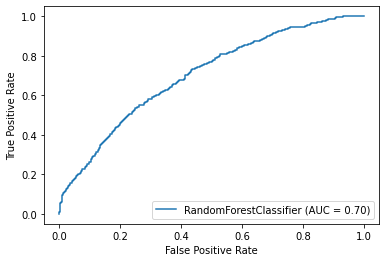

In [434]:
### Evaluating on the train set ####

predicted_train = clf.predict(features)

plot_roc_curve(clf,X =features, y= satisfactiontarget)

print ('The score for the RF model ', roc_auc_score(satisfactiontarget,predicted_train))

print(confusion_matrix(y_true = satisfactiontarget, y_pred = predicted_train))

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=satisfactiontarget,y_pred = predicted_train,sample_weight = satisfactiontarget))

In [435]:
##******************** validation of model ********************************

In [436]:
#plot_roc_curve(clf,X =X_val, y= Y_val)

#predicted_val = clf.predict(X_val)

#print (confusion_matrix(y_true = Y_val, y_pred = predicted_val))

#print ('The F1-SCORE on the validation set prediction ',f1_score(y_true=Y_val,y_pred = predicted_val,sample_weight = Y_val))

In [437]:
##*************************** running on test data *************************************

In [438]:
X_testfeatures1 = testfull.drop(testfull[['Target_Satisfied','Target_Salary']],axis=1)
satisfactiontargettest = testfull['Target_Satisfied']
salarytargettest = testfull['Target_Salary']

In [439]:
X_testfeatures1.shape, satisfactiontargettest.shape 

((590, 92), (590,))

[[273 190]
 [ 70  57]]
The F1-SCORE on the test set prediction  0.6195652173913043


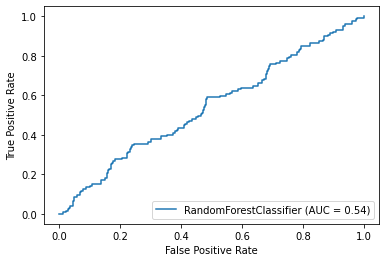

In [440]:
plot_roc_curve(clf,X =X_testfeatures1, y= satisfactiontargettest)

predicted_test = clf.predict(X_testfeatures1)

print (confusion_matrix(y_true = satisfactiontargettest, y_pred = predicted_test))

print ('The F1-SCORE on the test set prediction ',f1_score(y_true=satisfactiontargettest,y_pred = predicted_test,sample_weight = satisfactiontargettest))

In [422]:
### Calculating the feature importances ####

importances = clf.feature_importances_

columns = list(X_train.columns)

importances_dict = {columns[i]: importances[i] for i in range(len(columns))}

importances_dict = dict(sorted(importances_dict.items(), key=lambda importances_dict: importances_dict[1],reverse=True))

In [ ]:
#importances_dict   #to check the features importance

## Regression model

In [441]:
features.shape , salarytarget.shape

((2356, 92), (2356,))

In [442]:
X_testfeatures1.shape, salarytargettest.shape     ##### test data regression

((590, 92), (590,))

In [443]:
X_train2, X_val2 = train_test_split(features,test_size=0.2,random_state=100)     ## splitting into  80:20 i.e. train:test 

In [444]:
Y_train2, Y_val2 = train_test_split(salarytarget,test_size=0.2,random_state=100)     ## splitting into  80:20 i.e. train:test 

In [445]:
X_train2.shape , Y_train2.shape, X_val2.shape, Y_val2.shape

((1884, 92), (1884,), (472, 92), (472,))

In [446]:
from sklearn.ensemble import RandomForestRegressor

In [447]:
#### Fitting a random forest regressor ######

clf2 = RandomForestRegressor() ### random forest function from  sklearn

params={'n_estimators':[50,70,100],                 ## number of trees combination i want,                
        'criterion':['mse'],                        ## two different methods to find purity of node
        'max_depth':[8,9,10],                       ## depth combination
        'min_samples_split':[5,10,12,13,15],        ## minimum number of samples must be there for occurence of a split
        'max_samples':[0.7,0.8,0.9]}                ## parameter combinations

In [ ]:

grid_search2 = GridSearchCV(estimator = clf2,param_grid = params,cv = 5,return_train_score=True)

grid_search2.fit(X_train2 ,Y_train2)

In [ ]:
grid_search2.best_score_

In [ ]:
grid_search2.best_estimator_

In [ ]:
best_params2 = grid_search2.best_estimator_

In [498]:
## manually tuning parameters to reduce overfitting in the model

best_params2 =RandomForestRegressor(n_estimators=80, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=2, 
                                    min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,
                                    min_impurity_decrease=0.0, min_impurity_split=None,
                                    bootstrap=True, oob_score=False, n_jobs=None, random_state=None,
                                    verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [499]:
clf2= best_params2

clf2.fit(X_train2,Y_train2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [479]:
from sklearn import metrics
from math import sqrt

In [500]:
### Evaluating on the train set ####

predicted_train2 = clf2.predict(X_train2)
print('Random forest RMSE Train Score: {}'.format(sqrt(metrics.mean_squared_error(Y_train2, predicted_train2 ))))
print('Random forest R2 Train Score: {}'.format(metrics.r2_score(Y_train2, predicted_train2 )))

Random forest RMSE Train Score: 0.4188551686699879
Random forest R2 Train Score: 0.8211345723437041


In [458]:
### Evaluating on the validation set ####

predicted_val2 = clf2.predict(X_val2)
print('Random forest RMSE validation Score: {}'.format(sqrt(metrics.mean_squared_error(Y_val2, predicted_val2 ))))
print('Random forest R2 Validation Score: {}'.format(metrics.r2_score(Y_val2, predicted_val2 )))

In [501]:
### Evaluating on the test data set ####

predicted_test2 = clf2.predict(X_testfeatures1)
print('Random forest RMSE test Score: {}'.format(sqrt(metrics.mean_squared_error(salarytargettest, predicted_test2 ))))
print('Random forest R2 test Score: {}'.format(metrics.r2_score(salarytargettest, predicted_test2 )))

Random forest RMSE test Score: 0.9158161337707517
Random forest R2 test Score: 0.2207853822893856


In [327]:
### Calculating the feature importances ####

importances = clf2.feature_importances_

columns = list(X_train2.columns)

importances_dict = {columns[i]: importances[i] for i in range(len(columns))}

importances_dict = dict(sorted(importances_dict.items(), key=lambda importances_dict: importances_dict[1],reverse=True))

In [ ]:
#importances_dict

In [ ]:
#####************************* SUMMARY ************************************8

In [ ]:
# CLASSIFICATION :
# F1 score : 73.68 (on train data) and 61.95 (on test data)

# REGRESSION :
# RMSE : 0.41 (on train data) and 0.91 (on test data)

In [ ]:
#************************************************* THANK YOU ********************************************************************************